In [239]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Task 0
Read the dataset from csv file & perform data cleaning - remove all rows, which contains `?` in some columns.
Also check for data correctness (salary & salary $K).

In [240]:
employees_info = pd.read_csv("/projects/py-adult-data-analysis/data/adult.csv", index_col=[0])
employees_info = employees_info.replace({"?":np.nan}).dropna()
rich_people = employees_info.query('salary==">50K"')
poor_people = employees_info.query('salary=="<=50K"')
print(f"Rich people are definitely rich - {(rich_people['salary K$'] > 50).any()}.")
print(f"Poor people are definitely poor - {(poor_people['salary K$'] <= 50).any()}.")

Rich people are definitely rich - True.
Poor people are definitely poor - True.


# Task 1
Print the count of men and women in the dataset.

In [241]:
print(f"Men - {employees_info['sex'].tolist().count('Male')}.")
print(f"Women - {employees_info['sex'].tolist().count('Female')}.")

Men - 20380.
Women - 9782.


# Task 2
Find the average age of men in dataset

In [242]:
men = employees_info.query('sex=="Male"')
men[["sex", "age"]].groupby("sex").mean()

,age
sex,
Male,39.184004


# Task 3
Get the percentage of people from Poland (native-country)

In [243]:
count_of_people = employees_info["native-country"].count()
count_of_poles_people = employees_info["native-country"].value_counts()["Poland"]
print(f"The percentage of people from Poland - {count_of_poles_people / count_of_people:.3%}.")

The percentage of people from Poland - 0.186%.


# Task 4
Get the mean and standard deviation of the age for people who earn > 50K per year. After this, get it for those who earn <= 50K.

In [244]:
print(f"The average age of people who earn >50K $ per year - {rich_people['age'].mean():.3f}.")
print(f"The age standard deviation of people who earn >50K $ per year - {rich_people['age'].std():.3f}.")
print(f"The average age of people who earn <=50K $ per year - {poor_people['age'].mean():.3f}.")
print(f"The age standard deviation of people who earn <=50K $ per year - {poor_people['age'].std():.3f}.")

The average age of people who earn >50K $ per year - 43.959.
The age standard deviation of people who earn >50K $ per year - 10.270.
The average age of people who earn <=50K $ per year - 36.608.
The age standard deviation of people who earn <=50K $ per year - 13.465.


# Task 5
Check, if there are some people without higher education (education: Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters, Doctorate), but with > 50K salary

In [245]:
degree_of_education = ["Bachelors", "Prof-school", "Assoc-acdm", "Assoc-voc", "Masters", "Doctorate"]
rich_people["education"].isin(degree_of_education)

7        False
8         True
9         True
10       False
11        True
19        True
20        True
25        True
45        True
52        True
53        True
55       False
63        True
67       False
68       False
72        True
84       False
86       False
89        True
94        True
96        True
97       False
100       True
101       True
105      False
111       True
112      False
117       True
123       True
125       True
127       True
135       True
139      False
143       True
164       True
172      False
174       True
180      False
183      False
184      False
189       True
197       True
198       True
202       True
206       True
208      False
211      False
214      False
215       True
234       True
237       True
238       True
240       True
246      False
248       True
250       True
255      False
265      False
267      False
269      False
270      False
276      False
279      False
281      False
285       True
286       True
300       

# Task 6
Get the statistics of age for each type of education. Use `groupby` and `describe` for this.

In [246]:
employees_info.groupby("age")["education"].describe()

,count,unique,top,freq
age,,,,
17,328,8,11th,154
18,447,9,11th,143
19,594,13,Some-college,255
20,629,14,Some-college,330
21,621,14,Some-college,301
22,674,12,Some-college,253
23,824,14,Some-college,259
24,752,15,HS-grad,237
25,799,15,HS-grad,251


# Task 7
Compare the married and non-married men salaries. Who earns more? (>50K or <=50K)
Married men are those, whom `marital-status` starts with "Married". Others are not.

In [247]:
married_men = men[men["marital-status"].str.startswith("Married")]
non_married_men = men[~men["marital-status"].str.startswith("Married")]
salary_married_men = married_men["salary K$"].sum()
salary_non_married_men = non_married_men["salary K$"].sum()
print(f"Married men earn more than non-married men - {salary_married_men > salary_non_married_men}.")

Married men earn more than non-married men - True.


# Task 8
Get the max hours per week some person works. How many people works the same amount of hours per week?

In [248]:
max_hours_per_week = employees_info["hours-per-week"].max()
count_of_people_max_hours = employees_info["hours-per-week"].value_counts()[max_hours_per_week]
print(f"Max hours per week - {max_hours_per_week}.")
print(f"Count of people working the same count of hours - {count_of_people_max_hours}.")

Max hours per week - 99.
Count of people working the same count of hours - 78.


# Task 9
Analyze the correlation between data in dataset. Understand connected fields in it and print highlight their connection.

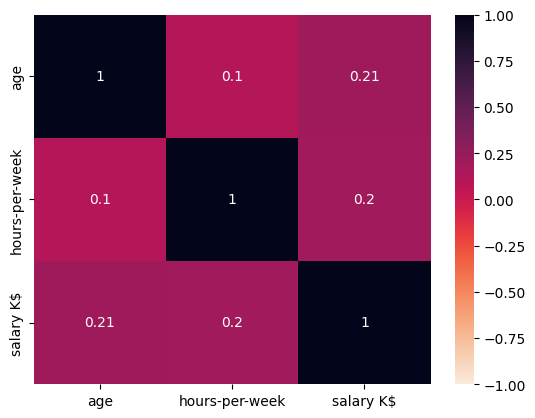

In [249]:
sns.heatmap(employees_info.corr(), vmin=-1, vmax=1, annot=True, cmap="rocket_r")
plt.show()